## 4. Gözetimsiz Öğrenme

Makine öğrenmesi modellerinde, bağımlı değişkenin elimizde olmadığı durumlarda gözlem birimlerinin bir şekilde anlamlı bir hale
getirilme çabası olarak nitelendirebiliriz.

Bu bölümde ele alınacak konular:
#####    • K-means
#####    • Hiyerarşik Kümeleme Analizi
#####    • Temel Bileşen Analizi (PCA)

## 4.1. K-Means

K-ortalama kümeleme ya da K-means kümeleme yöntemi N adet veri nesnesinden oluşan bir veri kümesini giriş parametresi olarak verilen K adet kümeye bölümlemektir.

##### İşlem adımları:
    1. Küme sayısını belirle.
    2. Rastgele k merkezi seç.
    3. Her gözlem için k merkezlerine olan uzaklıkları hesapla.
    4. Gözlemleri kendilerine en yakın k merkezine ata.
    5. Atama işleminden sonra oluşan kümeler için tekrar küme merkezi hesapla.
    6. Belirlenen iterasyon kadar işlemi tekrarla, küme içi hata değerinin en küçük olduğu durumdaki gözlemlerin kümelenme  yapısını nihai kümelenme olarak seç.

#### Verisetinin İncelenmesi

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import linkage

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

In [46]:
!pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 623.3 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
df=pd.read_csv("dataset/youtubeGB.csv") 
youtube=df.copy()
youtube.head()[["video_id","title","views"]]

,video_id,title,views
0,Jw1Y-zhQURU,John Lewis Christmas Ad 2017 - #MozTheMonster,7224515
1,3s1rvMFUweQ,Taylor Swift: …Ready for It? (Live) - SNL,1053632
2,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,17158579
3,PUTEiSjKwJU,Goals from Salford City vs Class of 92 and Fri...,27833
4,rHwDegptbI4,Dashcam captures truck's near miss with child ...,9815


In [14]:
# Videoların id'lerini listeler.
youtube.index = youtube.iloc[:,0]
youtube.index

Index(['Jw1Y-zhQURU', '3s1rvMFUweQ', 'n1WpP7iowLc', 'PUTEiSjKwJU',
       'rHwDegptbI4', 'AumaWl0TNBo', '2Vv-BfVoq4g', '-N5eucPMTTc',
       'LMCuKltaY3M', '9t9u_yPEidY',
       ...
       '2PH7dK6SLC8', 'HbaQ9xnoMGQ', 'Un8b0JDw0Bc', 'Ibp6KqGRVbY',
       'uKxWP56VStM', 'l884wKofd54', 'IP8k2xkhOdI', 'Il-an3K9pjg',
       '-DRsfNObKIQ', '4YFo4bdMO8Q'],
      dtype='object', name='video_id', length=38916)

In [15]:
# Sadece üzerinde çalışacağımız alanları seçelim.
youtube = youtube.iloc[:,7:11] # iloc[:,7:11] => başlangıç belirtmedik. 7-11(dahil) arası kolonları listeler.
youtube.head()

,views,likes,dislikes,comment_count
video_id,,,,
Jw1Y-zhQURU,7224515,55681,10247,9479
3s1rvMFUweQ,1053632,25561,2294,2757
n1WpP7iowLc,17158579,787420,43420,125882
PUTEiSjKwJU,27833,193,12,37
rHwDegptbI4,9815,30,2,30


In [16]:
youtube.isnull().sum()

views            0
likes            0
dislikes         0
comment_count    0
dtype: int64

In [5]:
youtube.describe().T # describe() metodu sayısal verilere sahip olan sütunların max, min, std… gibi değerlerini döndürür.

,count,mean,std,min,25%,50%,75%,max
views,38916.0,5.911944e+06,1.900121e+07,851.0,251527.25,981889.0,3683628.50,424538912.0
likes,38916.0,1.345196e+05,3.499893e+05,0.0,5897.00,25182.5,114089.25,5613827.0
dislikes,38916.0,7.612560e+03,5.095683e+04,0.0,200.00,821.0,3357.50,1944971.0
comment_count,38916.0,1.308835e+04,5.066740e+04,0.0,679.00,2478.0,9241.50,1626501.0


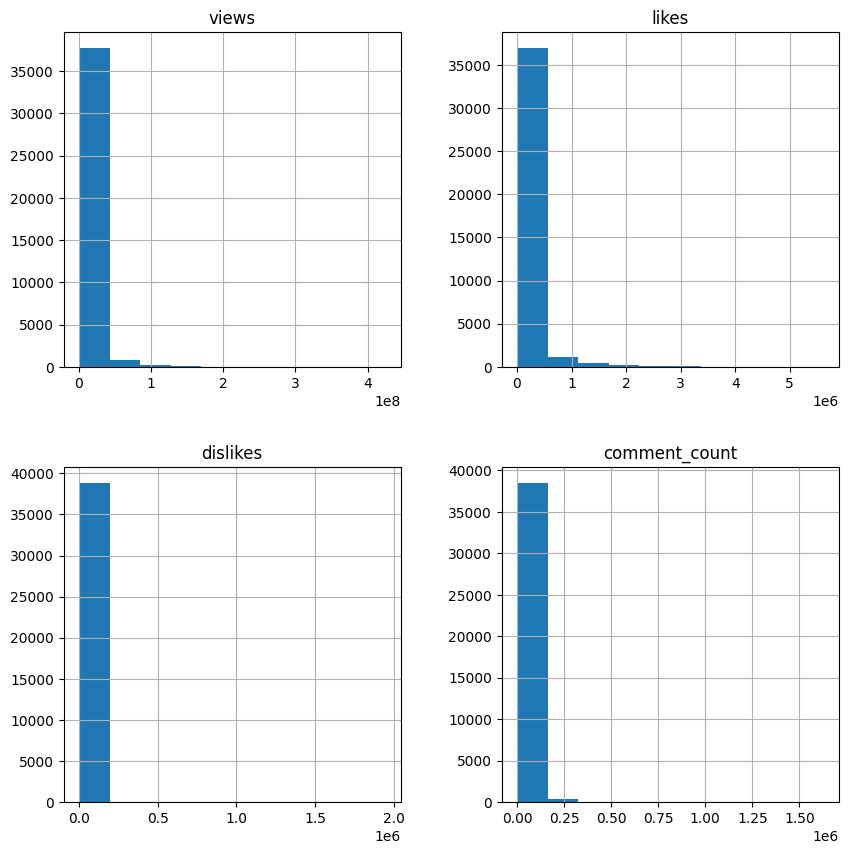

In [6]:
# Veri setindeki sayısal alanları bir de histogram grafiğinde görelim.
youtube.hist(figsize = (10,10));

### 4.1.1. K-Means Model

In [17]:
kmeans = KMeans(n_clusters = 4) # Veri kümesi 4 adet küme olacak şekilde kümelendirilecektir.
kmeans

KMeans(n_clusters=4)

In [18]:
from warnings import filterwarnings
filterwarnings('ignore')

k_fit = kmeans.fit(youtube)
k_fit.n_clusters

4

In [11]:
k_fit.cluster_centers_ # Kümeleme modelinin hesapladığı küme merkezlerini döndürür.
# Bu küme merkez noktaları, her bir kümenin karakteristiğini ve kümeleme sonuçlarını daha iyi anlamamıza yardımcı olacaktır.

array([[2.23635370e+07, 5.26198607e+05, 3.50681790e+04, 5.43585507e+04],
       [2.23753233e+08, 2.98463767e+06, 2.69929910e+05, 2.45123801e+05],
       [1.82320136e+06, 5.99576011e+04, 2.48028795e+03, 6.05015257e+03],
       [7.14311243e+07, 1.19440442e+06, 6.66483279e+04, 1.03954635e+05]])

In [12]:
k_fit.labels_ # Her bir veri noktasının atanmış olduğu küme değerlerini array biçiminde döndürür.

array([2, 2, 0, ..., 0, 0, 2])

### 4.1.2. Görselleştirme

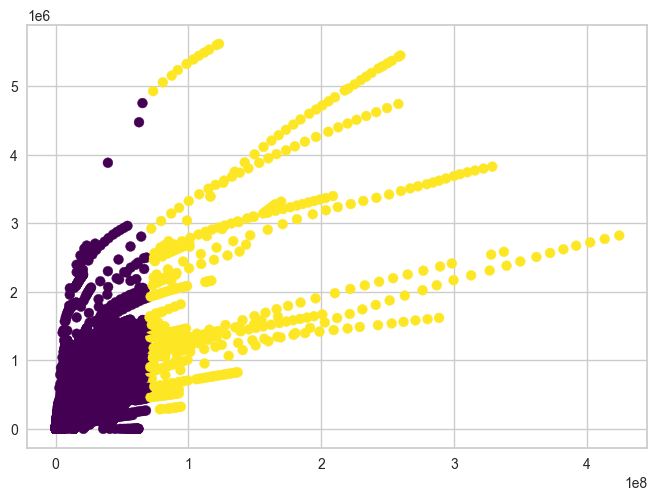

In [19]:
# İki değişken üzerinden (views ve likes) 2 boyutta veriyi görebilmek için görselleştirme yapalım.
kmeans = KMeans(n_clusters = 2) # 2 kümeli

k_fit = kmeans.fit(youtube)
kumeler = k_fit.labels_
plt.scatter(youtube.iloc[:,0], youtube.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");

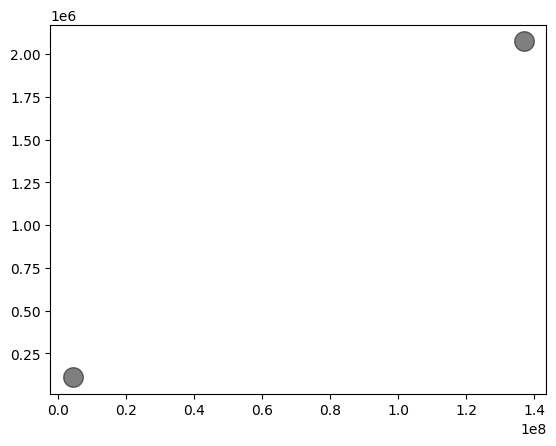

In [21]:
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

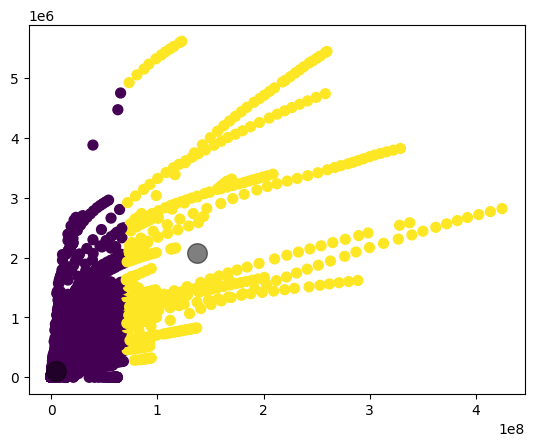

In [22]:
# Kümelerin merkezlerini yine grafik üzerinde gösterelim.
plt.scatter(youtube.iloc[:,0], youtube.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

### 4.1.3. Kümeler ve gözlem birimleri

In [42]:
kmeans = KMeans(n_clusters = 3) # 3 kümeli
k_fit = kmeans.fit(youtube)
kumeler = k_fit.labels_

pd.DataFrame({"Video ID" : youtube.index, "Kümeler": kumeler})[0:10] # Videolar hangi kümeye ait?

,Video ID,Kumeler
0,Jw1Y-zhQURU,0
1,3s1rvMFUweQ,0
2,n1WpP7iowLc,0
3,PUTEiSjKwJU,0
4,rHwDegptbI4,0
5,AumaWl0TNBo,0
6,2Vv-BfVoq4g,2
7,-N5eucPMTTc,0
8,LMCuKltaY3M,0
9,9t9u_yPEidY,0


In [40]:
# kume_no adında yeni alan oluşturup o kaydın hangi kümeye ait olduğunu belirten değerleri gösterelim.
youtube["kume_no"] = kumeler
youtube.head(10)

,views,likes,dislikes,comment_count,kume_no
video_id,,,,,
Jw1Y-zhQURU,7224515,55681,10247,9479,0
3s1rvMFUweQ,1053632,25561,2294,2757,0
n1WpP7iowLc,17158579,787420,43420,125882,0
PUTEiSjKwJU,27833,193,12,37,0
rHwDegptbI4,9815,30,2,30,0
AumaWl0TNBo,1182775,52708,1431,2333,0
2Vv-BfVoq4g,33523622,1634124,21082,85067,2
-N5eucPMTTc,1164201,57309,749,624,0
LMCuKltaY3M,154494,2163,147,211,0


In [41]:
youtube["kume_no"] = youtube["kume_no"] + 1 # Küme numaralarına +1 ekleme
youtube.head(10)

,views,likes,dislikes,comment_count,kume_no
video_id,,,,,
Jw1Y-zhQURU,7224515,55681,10247,9479,1
3s1rvMFUweQ,1053632,25561,2294,2757,1
n1WpP7iowLc,17158579,787420,43420,125882,1
PUTEiSjKwJU,27833,193,12,37,1
rHwDegptbI4,9815,30,2,30,1
AumaWl0TNBo,1182775,52708,1431,2333,1
2Vv-BfVoq4g,33523622,1634124,21082,85067,3
-N5eucPMTTc,1164201,57309,749,624,1
LMCuKltaY3M,154494,2163,147,211,1


### 4.1.4. Optimum Küme Sayısının Belirlenmesi

In [2]:
df=pd.read_csv("dataset/youtubeGB.csv") 
youtube=df.copy()
youtube=youtube.iloc[:,7:11]
youtube.head()

,views,likes,dislikes,comment_count
0,7224515,55681,10247,9479
1,1053632,25561,2294,2757
2,17158579,787420,43420,125882
3,27833,193,12,37
4,9815,30,2,30


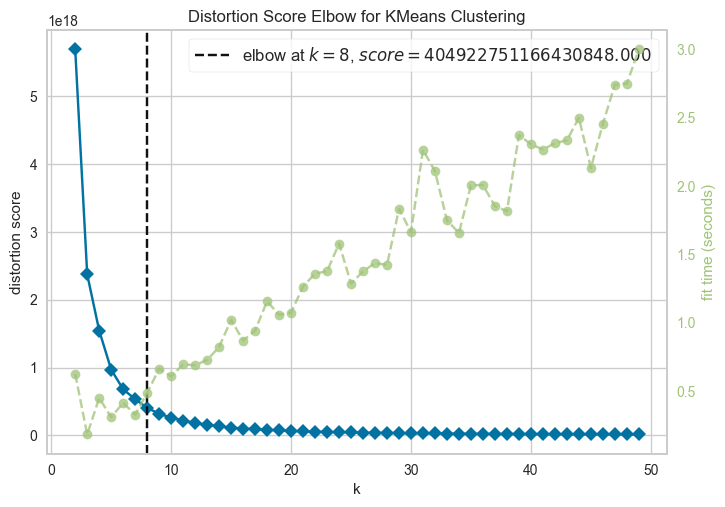

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

# Algoritmamızı grafik üzerinde görselleştirelim.
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(youtube)
visualizer.poof()

##### Not: 
Yukarıdaki grafiği incelersek k değeri yani optimum değer 8 görünmektedir.

In [5]:
kmeans = KMeans(n_clusters = 8) # Optimum değeri 8 olarak gözlemlediğimiz için küme sayısını 8 yaptık.
k_fit = kmeans.fit(youtube)
kumeler = k_fit.labels_

pd.DataFrame({"Video ID" : youtube.index, "Kumeler": kumeler})[0:10]

,Video ID,Kumeler
0,0,4
1,1,0
2,2,3
3,3,0
4,4,0
5,5,0
6,6,3
7,7,0
8,8,0
9,9,4


Yukarıda tekrar videoların hangi kümeye ait olduklarını listeledik. Ayrıca Videoların indexlerinin sayısal olarak 0'dan itibaren arttığını görmekteyiz.

## 4.2. Hiyerarşik Kümeleme Analizi

Temel amaç, gözlemleri birbirine olan benzerliklerini kullanarak alt kümelere ayırmaktır.

##### İşlem adımları:
    Başlangıçta gözlem sayısı kadar küme vardır.
    1. Veriseti içinde birbirine en yakın olan iki gözlemi bul.
    2. Bulunan iki noktayı bir araya getir ve yeni bir küme oluştur.
    3. Aynı işlemi tek bir küme kalıncaya kadar tekrarla.

In [21]:
df=pd.read_csv("dataset/youtubeGB.csv") 
youtube=df.copy()
youtube.index = youtube.iloc[:,0] # video_id'leri index olarak belirttik.
youtube=youtube.iloc[:,7:11] # Üzerinde çalışacağımız alanları seçtik.

youtube=youtube.sample(n=50) # Veri setimiz büyük olduğu için dendogram oluşturulması oldukça zaman alıyor. Bu yüzden                         
                            #  ilk 50 video için örneklem alarak veri setimiz üzerinde çalışma süresini kısaltmış olacağız.

In [22]:
hc_complete = linkage(youtube, "complete")
hc_complete

array([[9.00000000e+00, 1.40000000e+01, 1.72127569e+03, 2.00000000e+00],
       [4.80000000e+01, 4.90000000e+01, 2.21541554e+03, 2.00000000e+00],
       [6.00000000e+00, 4.20000000e+01, 4.66980728e+03, 2.00000000e+00],
       [2.20000000e+01, 2.50000000e+01, 8.18320047e+03, 2.00000000e+00],
       [4.40000000e+01, 5.20000000e+01, 1.24269588e+04, 3.00000000e+00],
       [5.00000000e+01, 5.10000000e+01, 1.27461022e+04, 4.00000000e+00],
       [2.60000000e+01, 3.80000000e+01, 1.27974455e+04, 2.00000000e+00],
       [2.10000000e+01, 3.00000000e+01, 1.66373494e+04, 2.00000000e+00],
       [4.30000000e+01, 5.60000000e+01, 1.72676445e+04, 3.00000000e+00],
       [7.00000000e+00, 5.30000000e+01, 1.91773414e+04, 3.00000000e+00],
       [0.00000000e+00, 2.30000000e+01, 2.85698808e+04, 2.00000000e+00],
       [5.70000000e+01, 5.80000000e+01, 3.01462598e+04, 5.00000000e+00],
       [1.90000000e+01, 5.40000000e+01, 3.08294627e+04, 4.00000000e+00],
       [2.00000000e+00, 4.50000000e+01, 3.21654257e

#### Dendogram: 
Bir dendrogram veya dendogram, bir ağacı temsil eden bir diyagramdır. Bu şekilsel gösterim, farklı bağlamlarda sıklıkla kullanılır: hiyerarşik kümelemede, ilgili analizler tarafından üretilen kümelerin düzenini gösterir.

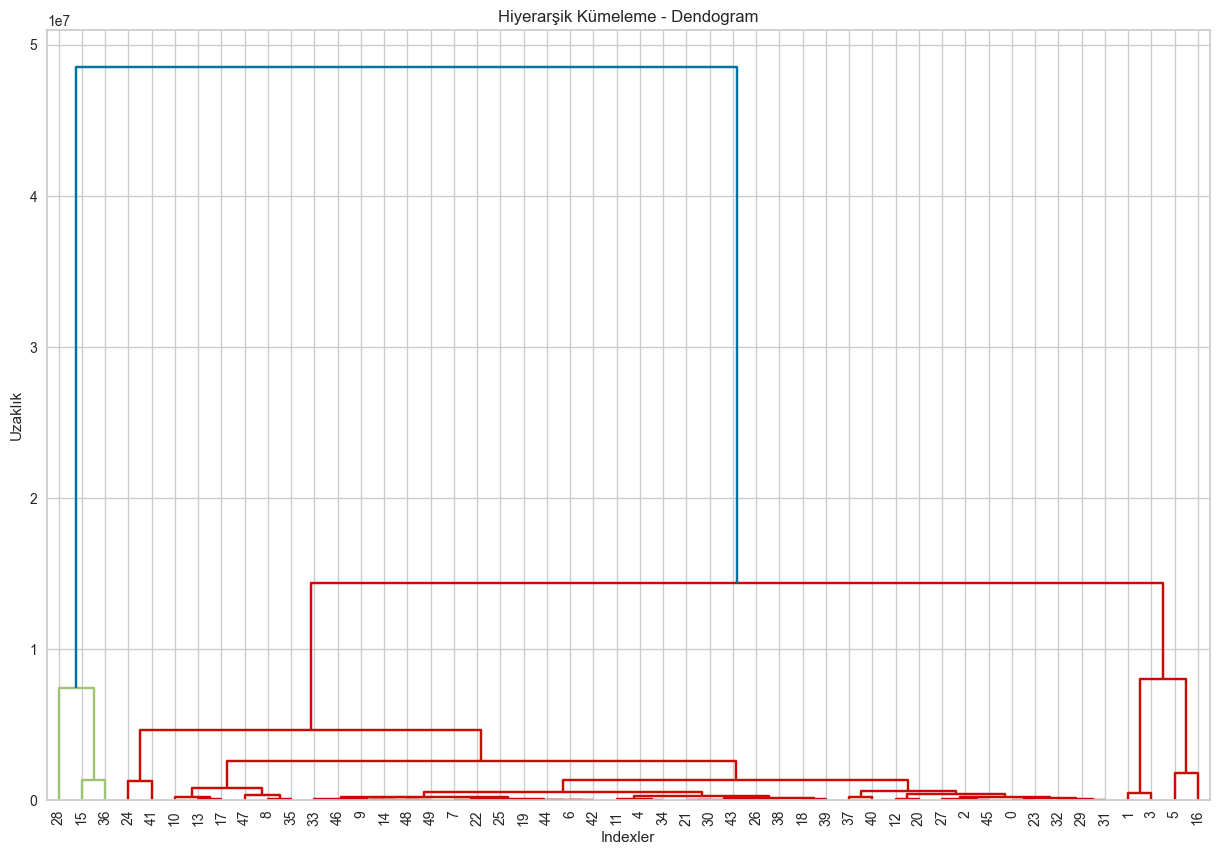

In [23]:
# Dendogramın oluşturulması(ilk 50 kayıt için)
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

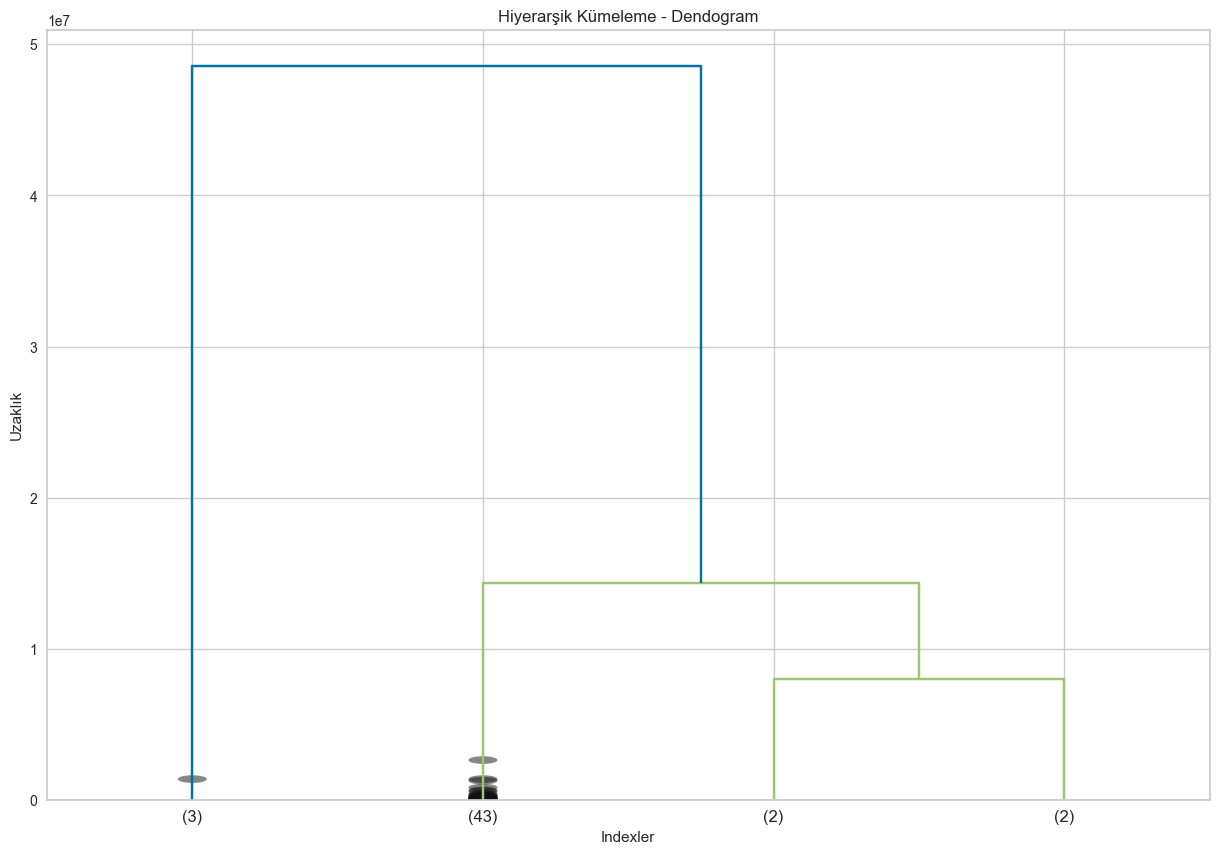

In [24]:
# Son 4 kümeyi göster.
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

### 4.2.1. Optimum Küme Sayısının Belirlenmesi

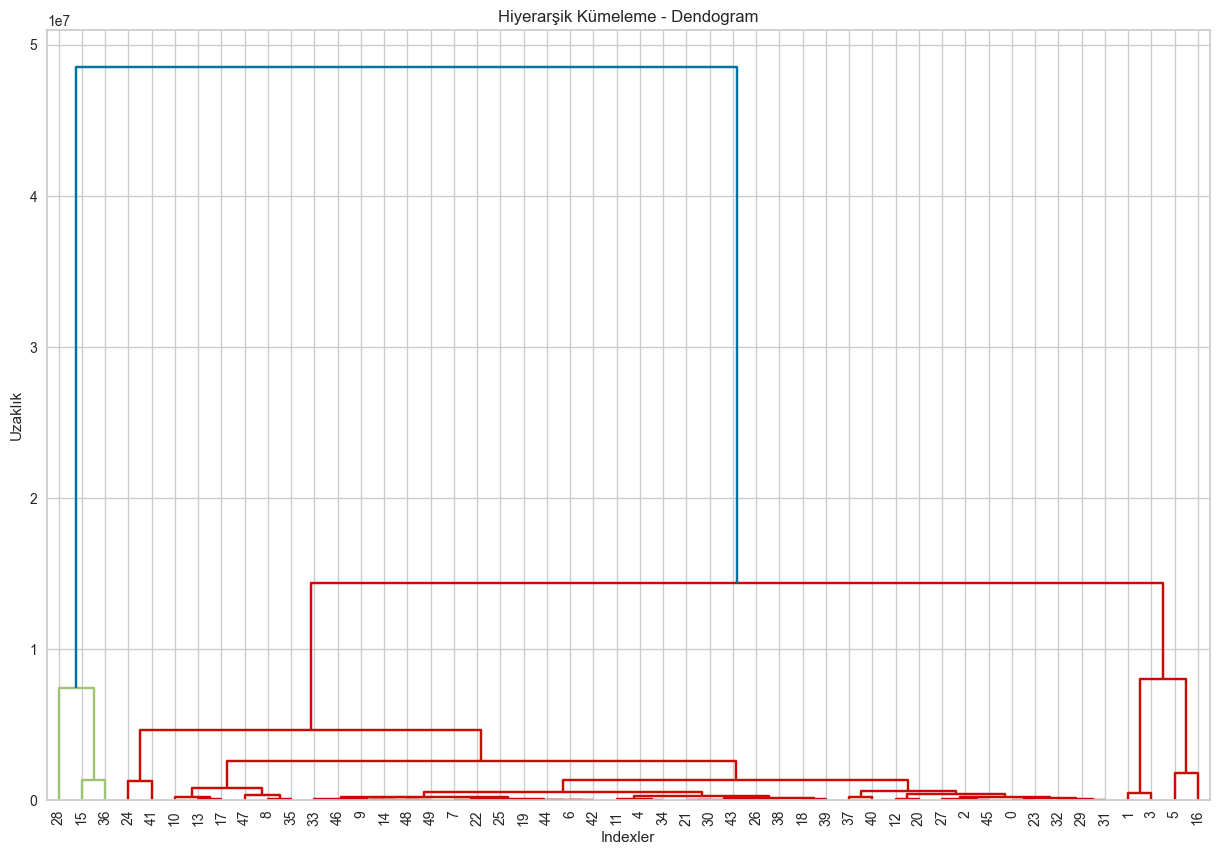

In [25]:
# Optimum küme sayısını ilk 50 kayıt için belirleyelim.
plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [28]:
# Üstteki grafikte uzaklık kısmında 1 doğrultusuna bakarak 4 uygun olabilir denilebilir.
# Uzman yorumuyla birlikte farklı değerler de seçilebilir.
cluster = AgglomerativeClustering(n_clusters = 4,
                                affinity = "euclidean",
                                linkage = "ward")
cluster.fit_predict(youtube)

array([2, 3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [31]:
# Videolar hangi kümeye ait bakalım (ilk 50 kayıt için).
pd.DataFrame({"Video ID" : youtube.index, "Kümeler": cluster.fit_predict(youtube)})[0:10]

,Video ID,Kümeler
0,Cyf1eXYE9Bw,2
1,9XaS93WMRQQ,3
2,oSumNo-j-oc,2
3,tLOl3s0uIM4,3
4,GFMyMxMYDNk,2
5,O-fydBL9g_k,1
6,D2mjQP8cmYA,2
7,1xvyVnkcgtE,2
8,B7AjF4of300,2
9,kwraJAssyuE,2


In [35]:
youtube["kume_no"] = cluster.fit_predict(youtube)
youtube.head()

,views,likes,dislikes,comment_count,kume_no
video_id,,,,,
Cyf1eXYE9Bw,985916,31274,316,1536,2
9XaS93WMRQQ,14354955,235003,7474,8895,3
oSumNo-j-oc,1154963,28735,274,3003,2
tLOl3s0uIM4,13856380,245814,12767,9945,3
GFMyMxMYDNk,553798,28369,261,1556,2


## 4.3. Temel Bileşen Analizi (PCA)


Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken ile temsil etmektir. Değişken boyutunu azaltma yöntemine gider.

In [6]:
df=pd.read_csv("dataset/youtubeGB.csv") 
youtube=df.copy()
youtube.index = youtube.iloc[:,0]# video_id'leri index olarak belirttik.
youtube=youtube.iloc[:,7:11]# Üzerinde çalışacağımız alanları seçtik.
youtube.head()

,views,likes,dislikes,comment_count
video_id,,,,
Jw1Y-zhQURU,7224515,55681,10247,9479
3s1rvMFUweQ,1053632,25561,2294,2757
n1WpP7iowLc,17158579,787420,43420,125882
PUTEiSjKwJU,27833,193,12,37
rHwDegptbI4,9815,30,2,30


In [7]:
# Veri standardizasyonu
youtube = StandardScaler().fit_transform(youtube)
youtube[0:5,0:5]

array([[ 0.06907919, -0.22526279,  0.05170011, -0.07123712],
       [-0.25568761, -0.31132366, -0.10437517, -0.20390796],
       [ 0.59189809,  1.8655108 ,  0.70271046,  2.2261868 ],
       [-0.30967429, -0.38380681, -0.14915875, -0.25759208],
       [-0.31062256, -0.38427254, -0.149355  , -0.25773024]])

In [9]:
# Herhangi bir boyut indirgemesi yapmadan tüm değişkenler için bileşen oluşturalım.
pca = PCA()
pca_fit = pca.fit_transform(youtube)

bilesen_y = pd.DataFrame(data = pca_fit)
bilesen_y.head()

,0,1,2,3
0,-0.102402,0.049352,-0.197274,0.106883
1,-0.442955,0.128594,-0.043077,0.013029
2,2.783898,0.189788,1.215407,0.129858
3,-0.556177,0.140289,-0.048252,0.021593
4,-0.557034,0.140850,-0.047910,0.021510


In [10]:
# Verisetindeki varyans açıklayabilme oranlarına bakalım.
pca.explained_variance_ratio_

array([0.70539344, 0.20078106, 0.07883585, 0.01498965])

##### Not: Yukarıdaki çıktıya baktığımızda;
1. bileşenin verisetindeki varyansı açıklayabilme oranı 0.70539344, 
2. bileşenin verisetindeki varyansı açıklayabilme oranı 0.20078106,
3. bileşenin verisetindeki varyansı açıklayabilme oranı 0.07883585,
4. bileşenin verisetindeki varyansı açıklayabilme oranı 0.01498965'dir.

In [12]:
# 2 bileşen verisetindeki varyansın yaklaşık 86%'sını ifade ediyor. Bu yüzden 2 bileşene indirelim.
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(youtube)

bilesen_y = pd.DataFrame(data = pca_fit,
                            columns = ["birinci_bilesen","ikinci_bilesen"])
bilesen_y.head()

,birinci_bilesen,ikinci_bilesen
0,-0.102402,0.049352
1,-0.442955,0.128594
2,2.783898,0.189788
3,-0.556177,0.140289
4,-0.557034,0.140850


In [13]:
# Verisetindeki varyans açıklayabilme oranlarına bakalım.
pca.explained_variance_ratio_

array([0.70539344, 0.20078106])

##### Not: Yukarıdaki çıktıya baktığımızda;
1. bileşenin verisetindeki varyansı açıklayabilme oranı 0.70539344, 
2. bileşenin verisetindeki varyansı açıklayabilme oranı 0.20078106' dır.

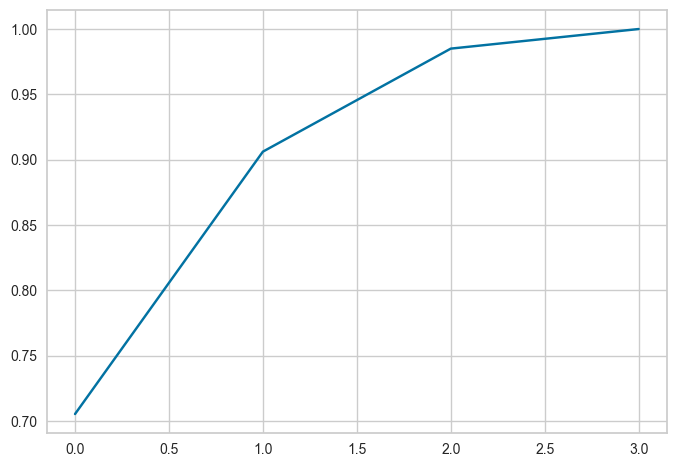

In [14]:
# Verisetindeki varyans açıklayabilme oranlarını grafik üzerinde inceleyelim.
pca = PCA().fit(youtube)

plt.plot(np.cumsum(pca.explained_variance_ratio_));

##### Not:
Yukarıdaki grafik incelendiğinde (x ekseni 0=1, 1=2 gibi düşünelim) 3 bileşen kullandığımızda verisetinin %95'inden fazlasını açıklayabiliyoruz anlamına gelmektedir.